In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8')

In [3]:
train_data_orig = pd.read_csv('../data/train.csv', parse_dates=['datetime'])
train_data_orig.set_index('datetime', inplace=True)

test_data_orig = pd.read_csv('../data/test.csv', parse_dates=['datetime'])
test_data_orig.set_index('datetime', inplace=True)

In [4]:
# Training Data Size : Number of instances: 10886; Number of features: 15
train_data_orig.shape

(10886, 11)

In [5]:
train_data_orig.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
2011-01-01 03:00:00        75        0.0       3          10     13  
2011-01-01 04:00:00        75        0.0       0           1      1

# EDA

In [6]:
# Renaming the target variables for ease of understanding as:
# casual: casual rides
# registered: registered rides
# count: total rides

train_data = train_data_orig.copy(deep = True)

train_data['casual_rides'] = train_data['casual']
train_data['registered_rides'] = train_data['registered']
train_data['total_rides'] = train_data['count']

train_data.drop(['casual', 'registered', 'count'], axis=1, inplace=True)

In [7]:
target_vars = ['casual_rides', 'registered_rides', 'total_rides']

# Dividing the input features into Categorical and Numerical Features
cat_features = ['season', 'holiday', 'workingday', 'weather']
num_features = ['temp', 'atemp', 'humidity', 'windspeed']

train_data_cat = train_data[cat_features + target_vars]
train_data_num = train_data[num_features + target_vars]

### Checking Data Imbalance in Categorical Variables

In [8]:
for feature in cat_features:
    print(train_data[feature].value_counts())
    print('----------------------')


season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
----------------------
holiday
0    10575
1      311
Name: count, dtype: int64
----------------------
workingday
1    7412
0    3474
Name: count, dtype: int64
----------------------
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
----------------------


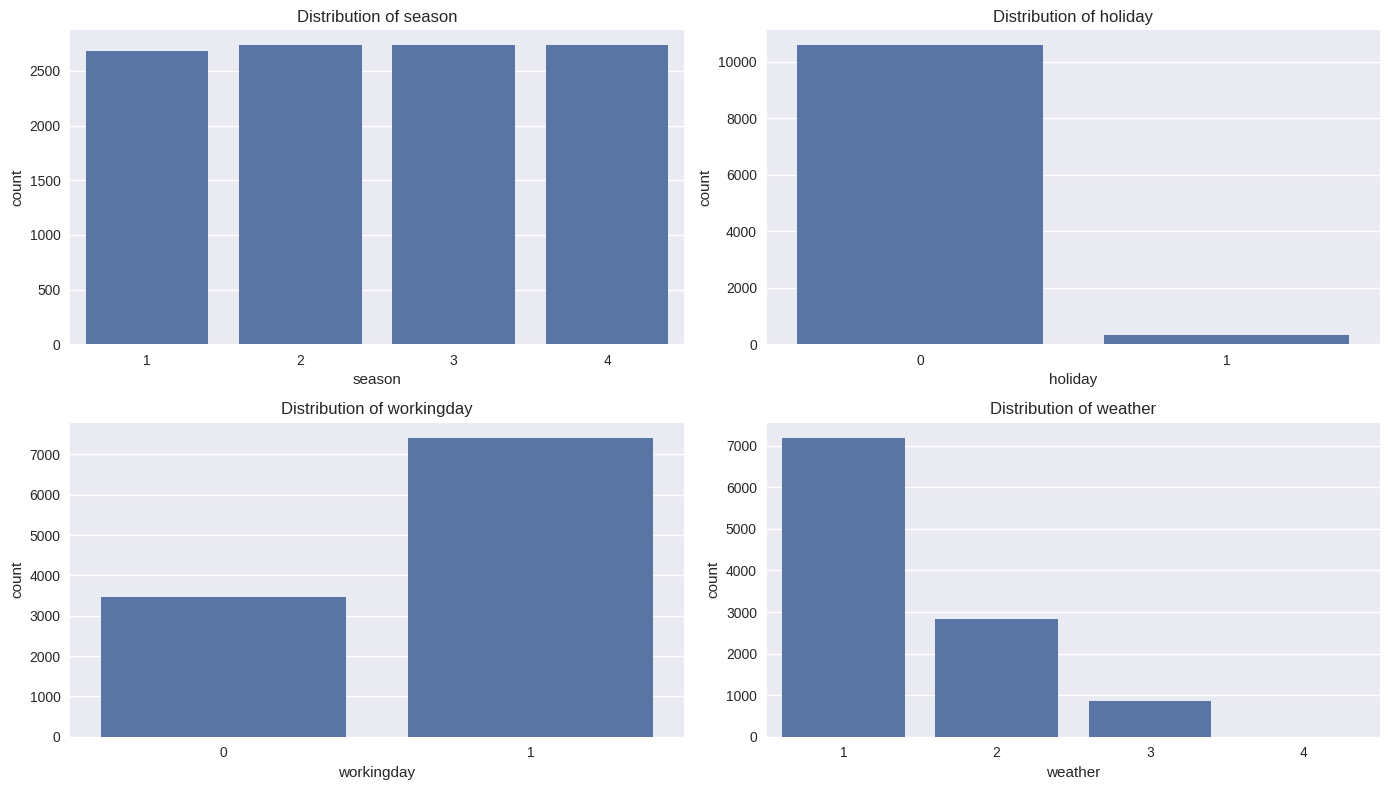

In [9]:
# Count plot for categorical variables for visually checking balance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

for i, col in enumerate(cat_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=train_data)
    plt.title('Distribution of {}'.format(col))


plt.tight_layout()
plt.show()

#### Observation
- Data distribution is completely balanced among the seasons
- Data is heavily dominated by observations on holidays
- Data is moderately dominated by observations by Working Days as against non-working days
- Data is comparable in size for the seasons 1, 2 and 3, and negligible for season 4

### Checking the variations based on different categories

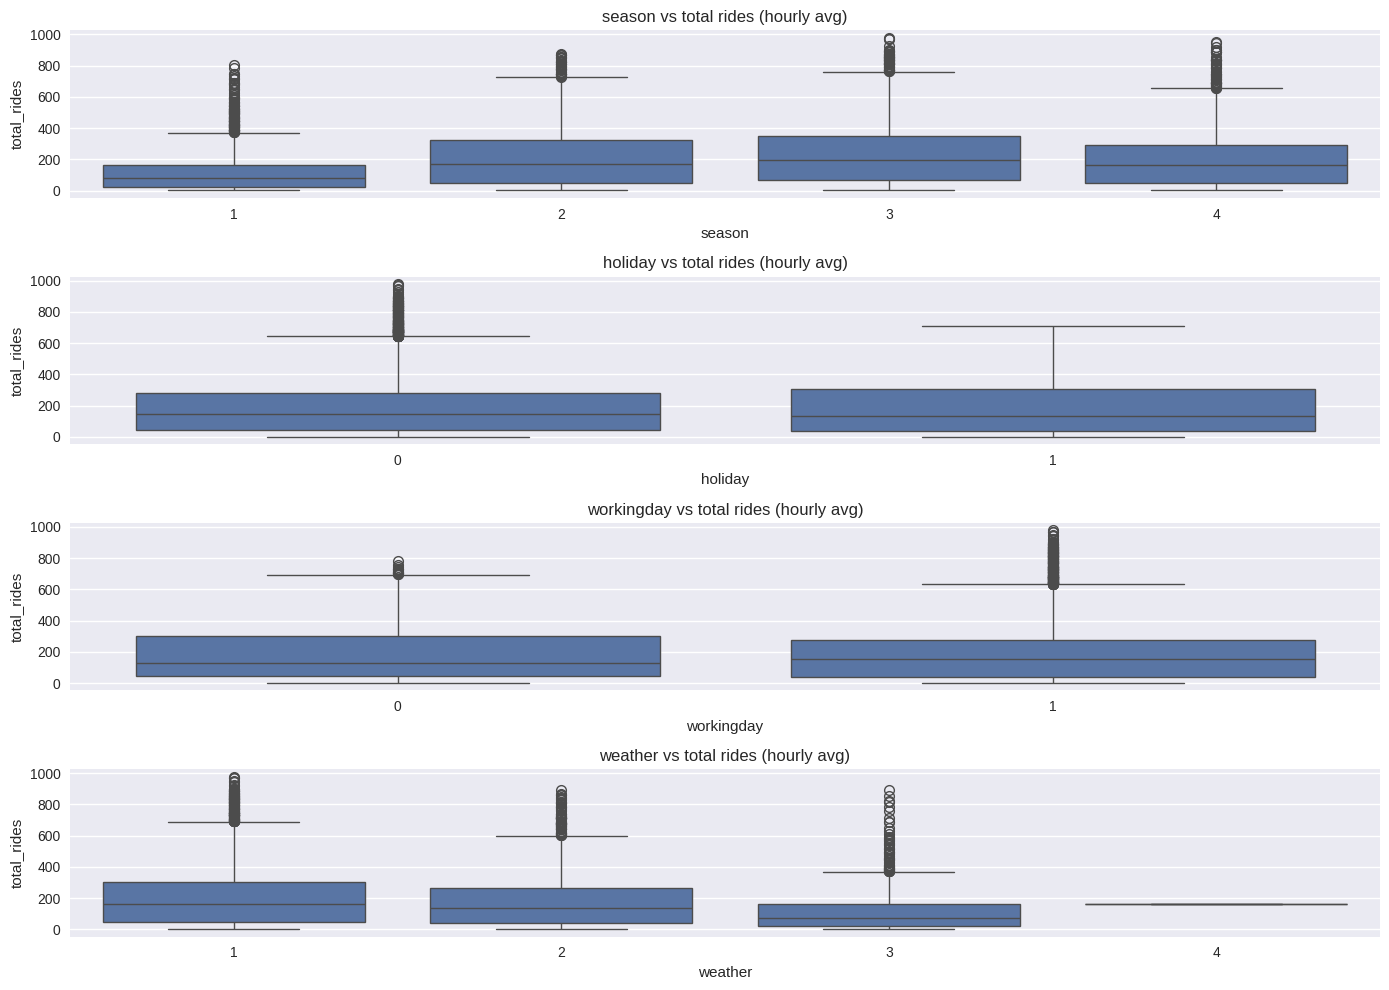

In [10]:
# Boxplots for categorical variables vs target variables
plt.figure(figsize=(14, 10))

for i, feature in enumerate(cat_features):
    plt.subplot(4, 1, i+1)
    sns.boxplot(x=feature, y='total_rides', data=train_data)
    plt.title(f'{feature} vs total rides (hourly avg)')

plt.tight_layout()
plt.show()

#### Observations
- Significant variation in the value of target variable total_rides based on different seasons and different weathers.
- Negligible variation in the value of target variable total_rides based on different working day or holiday.

<b>This indicates that features "season" and "weather" are useful inputs for predicting the target Variable.</b>

### Numerical Data

In [11]:
# Checking the distribution of numerical variables
train_data_num.describe()

temp         atemp      humidity     windspeed  casual_rides  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

       registered_rides   total_rides  
count      10886.000000  10886.000000  
mean         155.552177    191.574132  
std          151.039033    181.144454  
min            0.000000      1.000000  
25%           36.000000     42.000000  
50%          118.000000    145.000000  
75%          222.000000    284.000000  
max          886.000000    977.000000

#### Identifying Numerical Variables with a Strong Correlation with Target Variables

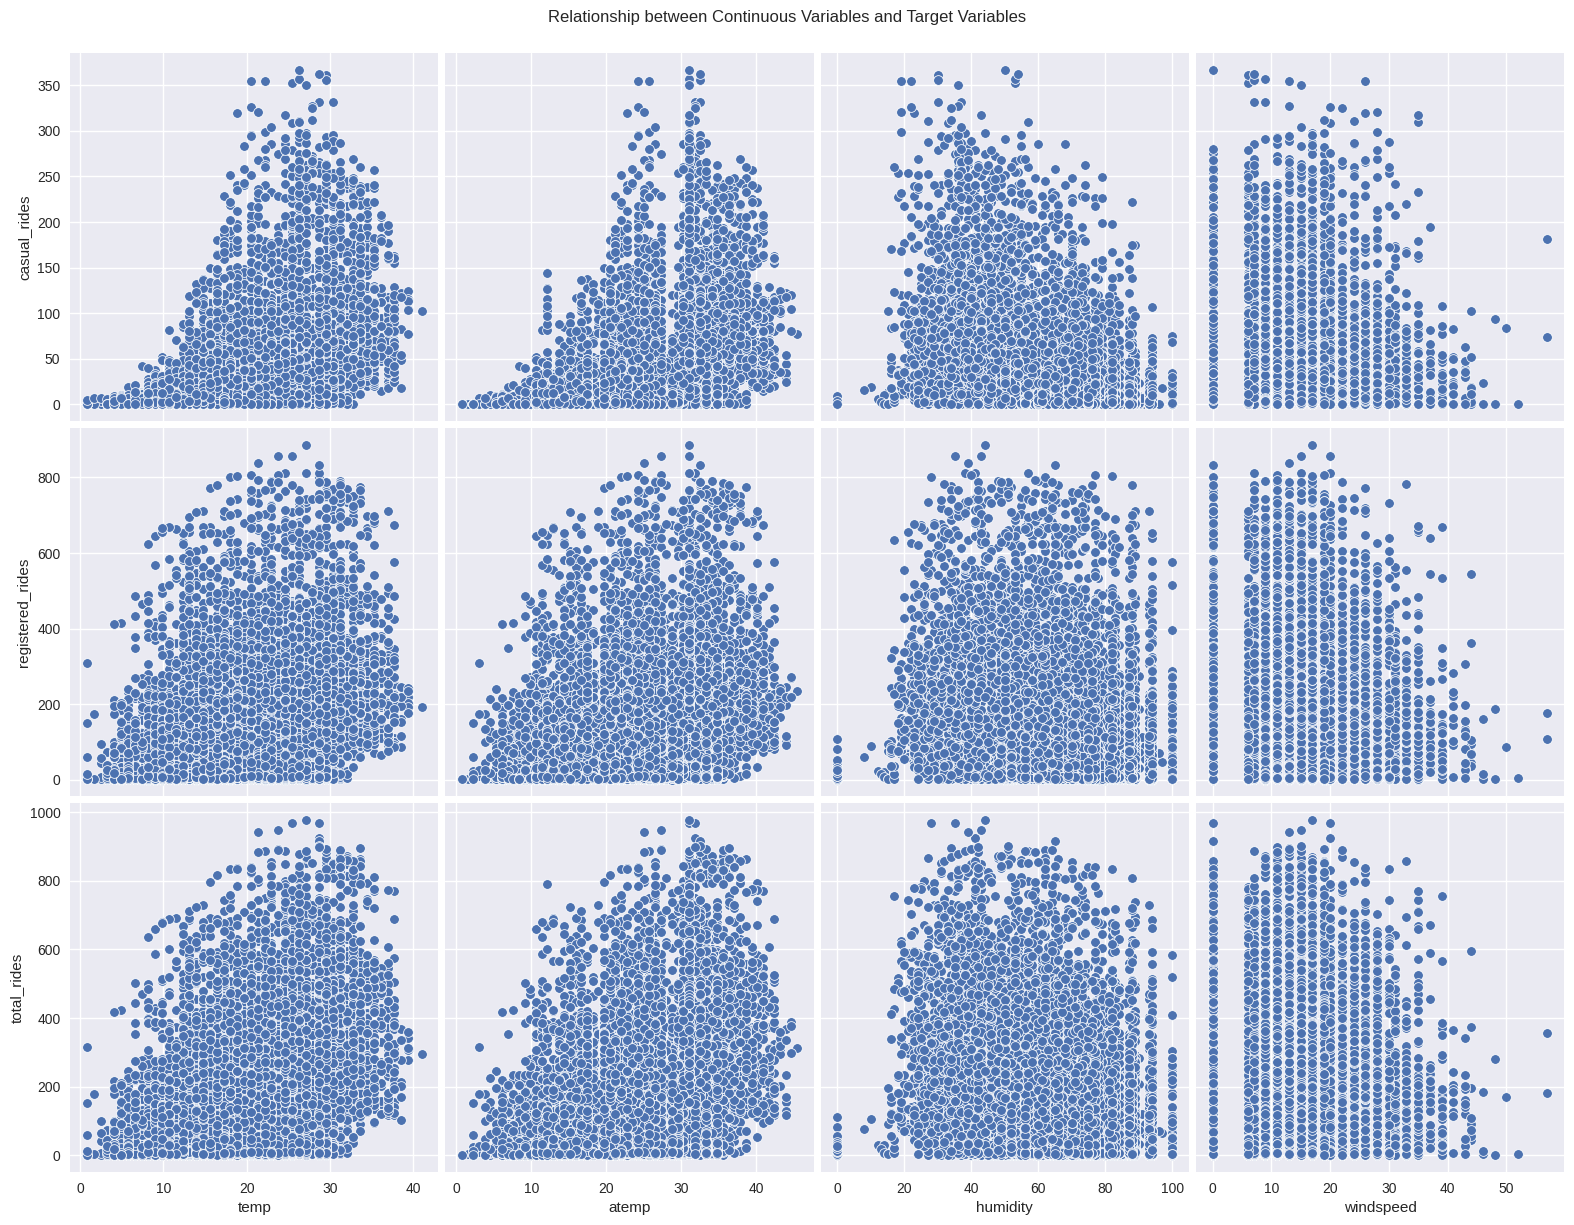

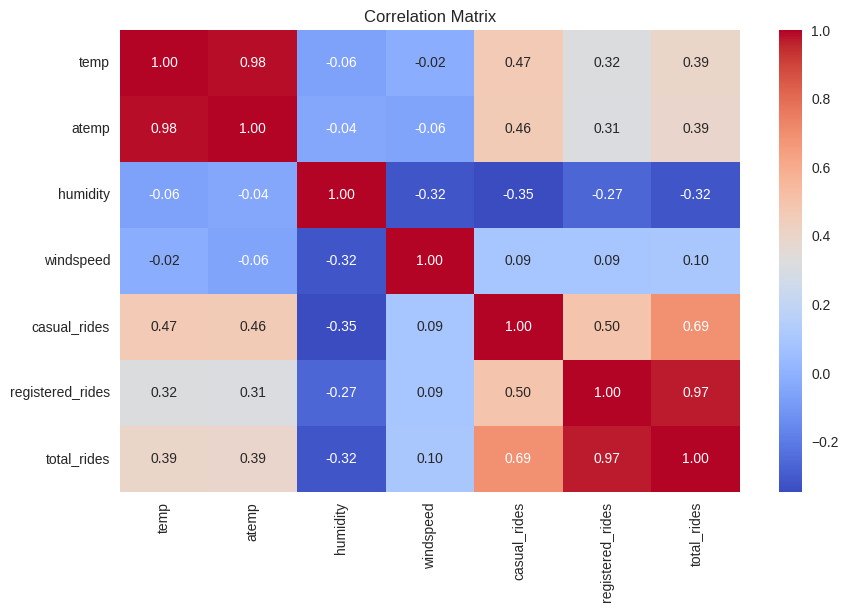

In [12]:
# Pairplot to see relationships between continuous variables and target variables
sns.pairplot(train_data, x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars=[
             'casual_rides', 'registered_rides', 'total_rides'], height=4, aspect=1)
plt.suptitle(
    'Relationship between Continuous Variables and Target Variables', y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = train_data[[
    'temp', 'atemp', 'humidity', 'windspeed', 'casual_rides', 'registered_rides', 'total_rides']].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##### Observations
- temp and atemp have a moderately strong positive correlation with the target variable total_rides, and particularly higher correlation with casual_rides as compared to registered_rides
- humidity has a moderate negative correlation with the target variable total_rides, following the pattern of strong correlation with casual_rides than registered_rides
- wind speed has a low correlation with all the target variables

<b>This shows that features temp and humidity are significant inputs for predicting the number of rides, especially for predicting casual rides</b>

Note: Correlation between temp and atemp is 0.98, showing almost exact replication of the data, and hence, only one of the variables can be used for predictio

### Determining the Variations in Data with Time

Intuitevely, possible variations to the total rides caused by:
- Hourly Variations within a Day: High Demand during peak hours & lower during remaining hours
- Day of the Week: Higher Demand on particular days as compared to other days
- Week of the Month: Higher Demand during certain weeks of a month as compared to others
- Monthly Variations: Higher Demand during certain months of the year
- Yearly Variations: Difference in the demand among different years

Based on these intuitions, we add new columns to the data to check these hypotheses

In [13]:
# hour of the day (Ex. 1, 2, ..., 23, 0)
train_data['hour'] = train_data.index.hour

# day of the week (Ex. 1, 2, ... 6, 7)
train_data['day_of_week'] = train_data.index.dayofweek

# week of the month (Ex. 1, 2 ..., 4, 5)
train_data['day_of_month'] = train_data.index.day
train_data['week_of_month'] = train_data.day_of_month.apply(lambda x: (x-1)//7 + 1)
train_data.drop(['day_of_month'], axis=1, inplace=True)

# month (Ex. 1, 2, ..., 12)
train_data['month'] = train_data.index.month

# year (Ex.2011, 2012)
train_data['year'] = train_data.index.year

In [14]:
train_data.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual_rides  registered_rides  \
datetime                                                                   
2011-01-01 00:00:00        81        0.0             3                13   
2011-01-01 01:00:00        80        0.0             8                32   
2011-01-01 02:00:00        80        0.0             5                27   
2011-01-01 03:00:00        75        0.0             3                10   
2011-01-01 04:00:00        75        0.0             0                 1   

                     total_rides  hour  day_of_week  week_of_month  month  \
datetime                                                                    
2011-01-01 00:00:00           16     0            5              1      1   
2011-01-01 01:00:00           40     1            5              1      1   
2011-01-01 02:00:00           32     2            5              1      1   
2011-01-01 03:00:00           13     3            5              1      1   
2011-01-01 04:00:00            1     4            5              1      1   

                     year  
datetime                   
2011-01-01 00:00:00  2011  
2011-01-01 01:00:00  2011  
2011-01-01 02:00:00  2011  
2011-01-01 03:00:00  2011  
2011-01-01 04:00:00  2011

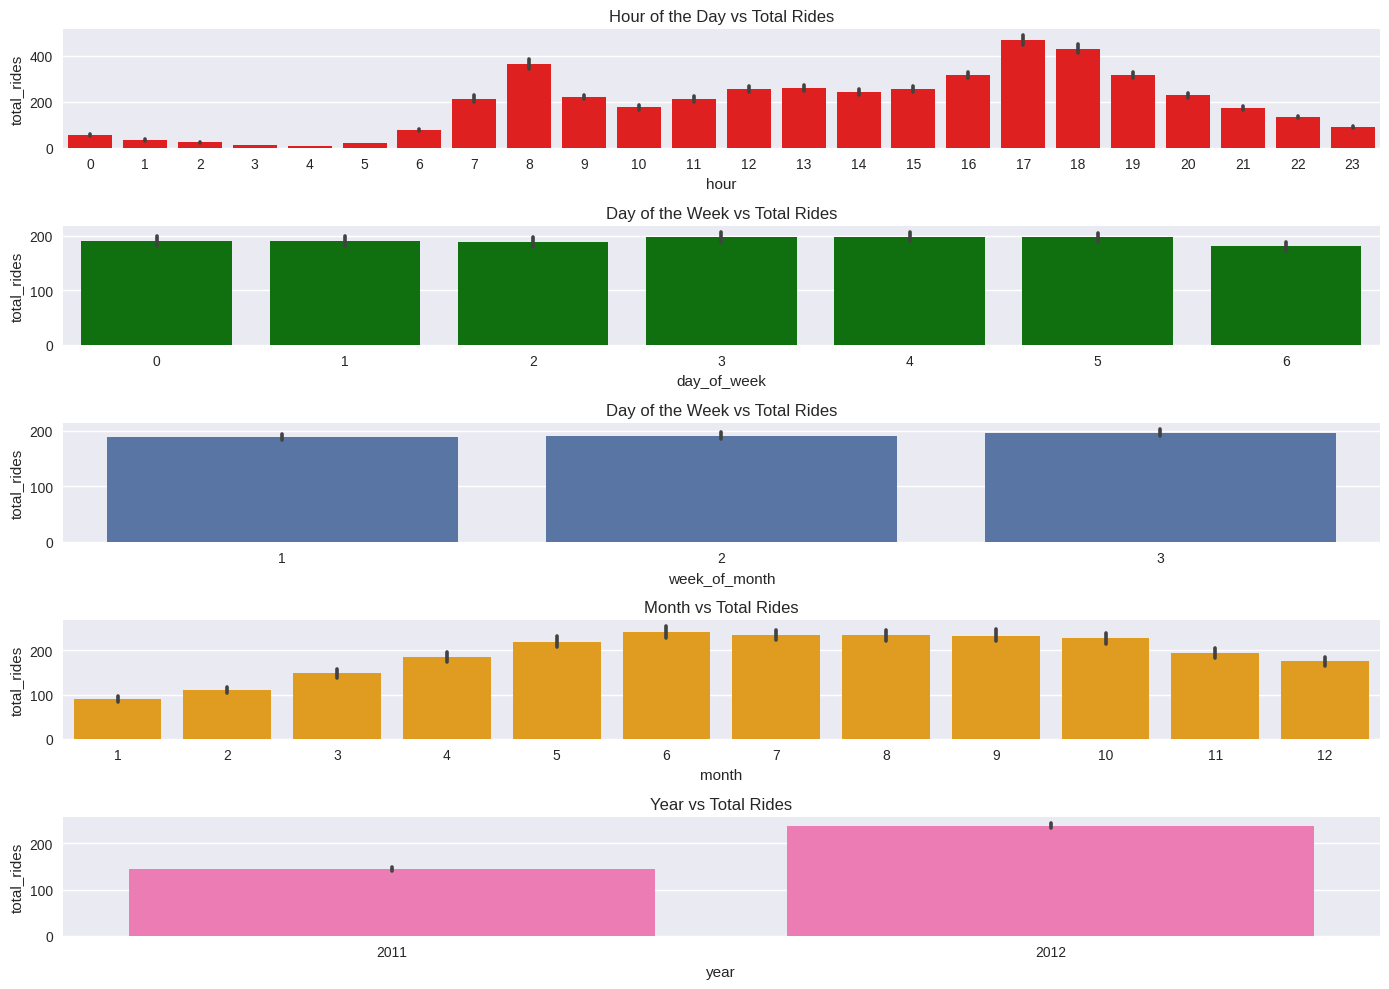

In [15]:
# Plotting the impact of time features on the target variables
plt.figure(figsize=(14, 10))

# Hour vs Count
plt.subplot(5, 1, 1)
sns.barplot(x='hour', y='total_rides', data=train_data, color='red')
plt.title('Hour of the Day vs Total Rides')

# Day of the Week vs Count
plt.subplot(5, 1, 2)
sns.barplot(x='day_of_week', y='total_rides', data=train_data, color='green')
plt.title('Day of the Week vs Total Rides')

# Week of the month vs Count
plt.subplot(5, 1, 3)
sns.barplot(x='week_of_month', y='total_rides', data=train_data)
plt.title('Day of the Week vs Total Rides')

# Month vs Count
plt.subplot(5, 1, 4)
sns.barplot(x='month', y='total_rides', data=train_data, color='orange')
plt.title('Month vs Total Rides')

# Year vs Count
plt.subplot(5, 1, 5)
sns.barplot(x='year', y='total_rides', data=train_data, color='hotpink')
plt.title('Year vs Total Rides')

plt.tight_layout()
plt.show()

#### Observations
- Hour of the day, month of the year and year have a high impact on the total rides
- Week of the month and day of the week have a relatively lower direct impact on the total rides

## Data Processing

#### 1. Handle categorical variables
One-hot encoding the categorical variables

In [16]:
# One-Hot Encoding for categorical variables
train_data_encoded = pd.get_dummies(train_data_orig, columns=[
                                    'season', 'holiday', 'workingday', 'weather'], drop_first=True)

# Renaming the target variables for ease of understanding as:
train_data_encoded['casual_rides'] = train_data_orig['casual']
train_data_encoded['registered_rides'] = train_data_orig['registered']
train_data_encoded['total_rides'] = train_data_orig['count']

train_data_encoded.drop(['casual', 'registered', 'count'], axis=1, inplace=True)


In [17]:
train_data_encoded.head()

temp   atemp  humidity  windspeed  season_2  season_3  \
datetime                                                                     
2011-01-01 00:00:00  9.84  14.395        81        0.0     False     False   
2011-01-01 01:00:00  9.02  13.635        80        0.0     False     False   
2011-01-01 02:00:00  9.02  13.635        80        0.0     False     False   
2011-01-01 03:00:00  9.84  14.395        75        0.0     False     False   
2011-01-01 04:00:00  9.84  14.395        75        0.0     False     False   

                     season_4  holiday_1  workingday_1  weather_2  weather_3  \
datetime                                                                       
2011-01-01 00:00:00     False      False         False      False      False   
2011-01-01 01:00:00     False      False         False      False      False   
2011-01-01 02:00:00     False      False         False      False      False   
2011-01-01 03:00:00     False      False         False      False      False   
2011-01-01 04:00:00     False      False         False      False      False   

                     weather_4  casual_rides  registered_rides  total_rides  
datetime                                                                     
2011-01-01 00:00:00      False             3                13           16  
2011-01-01 01:00:00      False             8                32           40  
2011-01-01 02:00:00      False             5                27           32  
2011-01-01 03:00:00      False             3                10           13  
2011-01-01 04:00:00      False             0                 1            1

#### 2. Feature Egnineering
- Extracted year, month, week of the month, day of the week, and hour of the day from datetime Index to be used as additional features for prediction
- Removed feature "atemp" since it is almost exactly imitating the feature "temp"


In [18]:
# Extracting hour, day of week, and month from the index (datetime)
train_data_encoded['hour'] = train_data_orig.index.hour
train_data_encoded['day_of_week'] = train_data_orig.index.dayofweek
train_data_encoded['month'] = train_data_orig.index.month
train_data_encoded['year'] = train_data_orig.index.year
train_data_encoded['day_of_month'] = train_data_orig.index.day
train_data_encoded['week_of_month'] = train_data_encoded.day_of_month.apply(
    lambda x: (x-1)//7 + 1
)

train_data_encoded.drop(['atemp', 'day_of_month'], axis=1, inplace=True)

# Checking the new columns
train_data_encoded[['hour', 'day_of_week', 'month', 'year']].head()
train_data_encoded[['hour', 'day_of_week', 'month', 'year', 'week_of_month']].head()

hour  day_of_week  month  year  week_of_month
datetime                                                          
2011-01-01 00:00:00     0            5      1  2011              1
2011-01-01 01:00:00     1            5      1  2011              1
2011-01-01 02:00:00     2            5      1  2011              1
2011-01-01 03:00:00     3            5      1  2011              1
2011-01-01 04:00:00     4            5      1  2011              1

#### 3. Data normalization

In [19]:
from sklearn.preprocessing import StandardScaler

# List of numerical variables
numerical_features = ['temp', 'humidity', 'windspeed', 'hour', 'day_of_week', 'month', 'year', 'week_of_month']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical features
train_data_encoded[numerical_features] = scaler.fit_transform(
    train_data_encoded[numerical_features])

# Checking the scaled numerical features
train_data_encoded[numerical_features].head()

temp  humidity  windspeed      hour  day_of_week  \
datetime                                                                    
2011-01-01 00:00:00 -1.333661  0.993213  -1.567754 -1.668944     0.990793   
2011-01-01 01:00:00 -1.438907  0.941249  -1.567754 -1.524341     0.990793   
2011-01-01 02:00:00 -1.438907  0.941249  -1.567754 -1.379739     0.990793   
2011-01-01 03:00:00 -1.333661  0.681430  -1.567754 -1.235137     0.990793   
2011-01-01 04:00:00 -1.333661  0.681430  -1.567754 -1.090534     0.990793   

                        month      year  week_of_month  
datetime                                                
2011-01-01 00:00:00 -1.603121 -1.003866      -1.134808  
2011-01-01 01:00:00 -1.603121 -1.003866      -1.134808  
2011-01-01 02:00:00 -1.603121 -1.003866      -1.134808  
2011-01-01 03:00:00 -1.603121 -1.003866      -1.134808  
2011-01-01 04:00:00 -1.603121 -1.003866      -1.134808

#### 4. Data split

In [20]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = train_data_encoded.drop(['casual_rides', 'registered_rides', 'total_rides'], axis=1)
y = train_data_encoded[['casual_rides', 'registered_rides', 'total_rides']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Checking the shapes of the train and test sets
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (8708, 16), X_test shape: (2178, 16)
y_train shape: (8708, 3), y_test shape: (2178, 3)


#### 5. Checking Missing values

In [21]:
# Check for missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

temp             0
humidity         0
windspeed        0
season_2         0
season_3         0
season_4         0
holiday_1        0
workingday_1     0
weather_2        0
weather_3        0
weather_4        0
hour             0
day_of_week      0
month            0
year             0
week_of_month    0
dtype: int64
casual_rides        0
registered_rides    0
total_rides         0
dtype: int64


In [22]:
# Checking the final structure of the data
X_train.head()

temp  humidity  windspeed  season_2  season_3  \
datetime                                                                 
2011-07-06 05:00:00  0.981763  1.097141  -0.832442     False      True   
2012-08-04 16:00:00  2.139474 -1.189268   0.881916     False      True   
2012-07-11 15:00:00  1.613242 -1.085341   0.514260     False      True   
2011-04-10 04:00:00 -0.702182  1.616779  -0.710164      True     False   
2011-11-19 10:00:00 -0.912675 -0.877485   0.514260     False     False   

                     season_4  holiday_1  workingday_1  weather_2  weather_3  \
datetime                                                                       
2011-07-06 05:00:00     False      False          True      False      False   
2012-08-04 16:00:00     False      False         False      False      False   
2012-07-11 15:00:00     False      False          True      False      False   
2011-04-10 04:00:00     False      False         False       True      False   
2011-11-19 10:00:00      True      False         False      False      False   

                     weather_4      hour  day_of_week     month      year  \
datetime                                                                    
2011-07-06 05:00:00      False -0.945932    -0.505845  0.138930 -1.003866   
2012-08-04 16:00:00      False  0.644693     0.990793  0.429272  0.996149   
2012-07-11 15:00:00      False  0.500091    -0.505845  0.138930  0.996149   
2011-04-10 04:00:00      False -1.090534     1.489672 -0.732096 -1.003866   
2011-11-19 10:00:00      False -0.222921     0.990793  1.300297 -1.003866   

                     week_of_month  
datetime                            
2011-07-06 05:00:00      -1.134808  
2012-08-04 16:00:00      -1.134808  
2012-07-11 15:00:00       0.134824  
2011-04-10 04:00:00       0.134824  
2011-11-19 10:00:00       1.404456

## Modelling

### Objective

Test Data has 3 three target variables to predict. Here is the objective of the model in the order of significance:
- Obtain best predictions for "count" variable (maximise r2, minimise MSE)
- Obtain best predictions for "registered" and "casual" variables (maximise r2, minimise MSE)

<b>The primary benchmark for model performance would be the r2 score of the model on "count" variable. The next metrics to evaluate the model would be the model performance (r2 Scores) on "registered" and "casual" variables</b>

### Approaches
3 ways: 
##### 1. Separate Single-Output Models
Separate models would be trained on the 3 target variables - casual, registered and count., each predicting the demand independently for its taget variable.

##### 2. Multi-Output Model
Combined model for trained for predicting the 3 target variables simultaneously 

##### 3. Derived Model from Single-Output Models
Two separate single-output models would be trained on "casual" and "registered" target variables, and the model for "count" variable would be obtained by simply adding the predictions of the casual and registered target variables


### Functions to train and eval the model

In [23]:
# Function for single output models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics = {
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

    return y_pred, metrics

In [24]:
# Function for multi output models
from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_and_evaluate_multi(model, X_train, X_test, y_train, y_test):

    # Wrap with MultiOutputRegressor
    multi_model = MultiOutputRegressor(model)

    # Train the model
    multi_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_multi = multi_model.predict(X_test)
    
    metrics_multi = []

    # Evaluate
    for i, target in enumerate(y_train.columns):
        mse = mean_squared_error(y_test[target], y_pred_multi[:, i])
        mae = mean_absolute_error(y_test[target], y_pred_multi[:, i])
        r2 = r2_score(y_test[target], y_pred_multi[:, i])
        metrics_multi.append({
            'mse': mse,
            'mae': mae,
            'r2': r2
        })


    return y_pred_multi, metrics_multi

In [25]:
# Function for derived model from single output models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_and_evaluate_derived(model, X_train, X_test, y_train, y_test):

    # Wrap with MultiOutputRegressor
    # multi_model = MultiOutputRegressor(model)

    # # Train the model
    # multi_model.fit(X_train, y_train)

    # # Predict on the test set
    # y_pred_multi = multi_model.predict(X_test)
    
    y_pred_total = np.zeros((y_test.shape[0]))
    metrics_multi = []

    # Evaluate
    for target in ['casual_rides', 'registered_rides']:

        # Train the model
        model.fit(X_train, y_train[target])

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Add predictions to total
        y_pred_total += y_pred

        # Get specific predictions for evaluation
        if target == 'casual_rides':
            y_pred_causal = y_pred
        elif target == 'registered_rides':
            y_pred_registered = y_pred 

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test[target], y_pred)
        mae = mean_absolute_error(y_test[target], y_pred)
        r2 = r2_score(y_test[target], y_pred)
        metrics_multi.append({
            'mse': mse,
            'mae': mae,
            'r2': r2
        })

    mse_total = mean_squared_error(y_test['total_rides'], y_pred_total)
    mae_total = mean_absolute_error(y_test['total_rides'], y_pred_total)
    r2_total = r2_score(y_test['total_rides'], y_pred_total)
    metrics_multi.append({
        'mse': mse_total,
        'mae': mae_total,
        'r2': r2_total
    })

    y_pred_multi = np.column_stack(
    (y_pred_causal, y_pred_registered, y_pred_total))


    return y_pred_multi, metrics_multi

### 1st Approach: Single-Output Models

##### 1. Initialize models

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(
    n_estimators=100, random_state=42, objective='reg:squarederror')

##### 2. Train & Evaluate

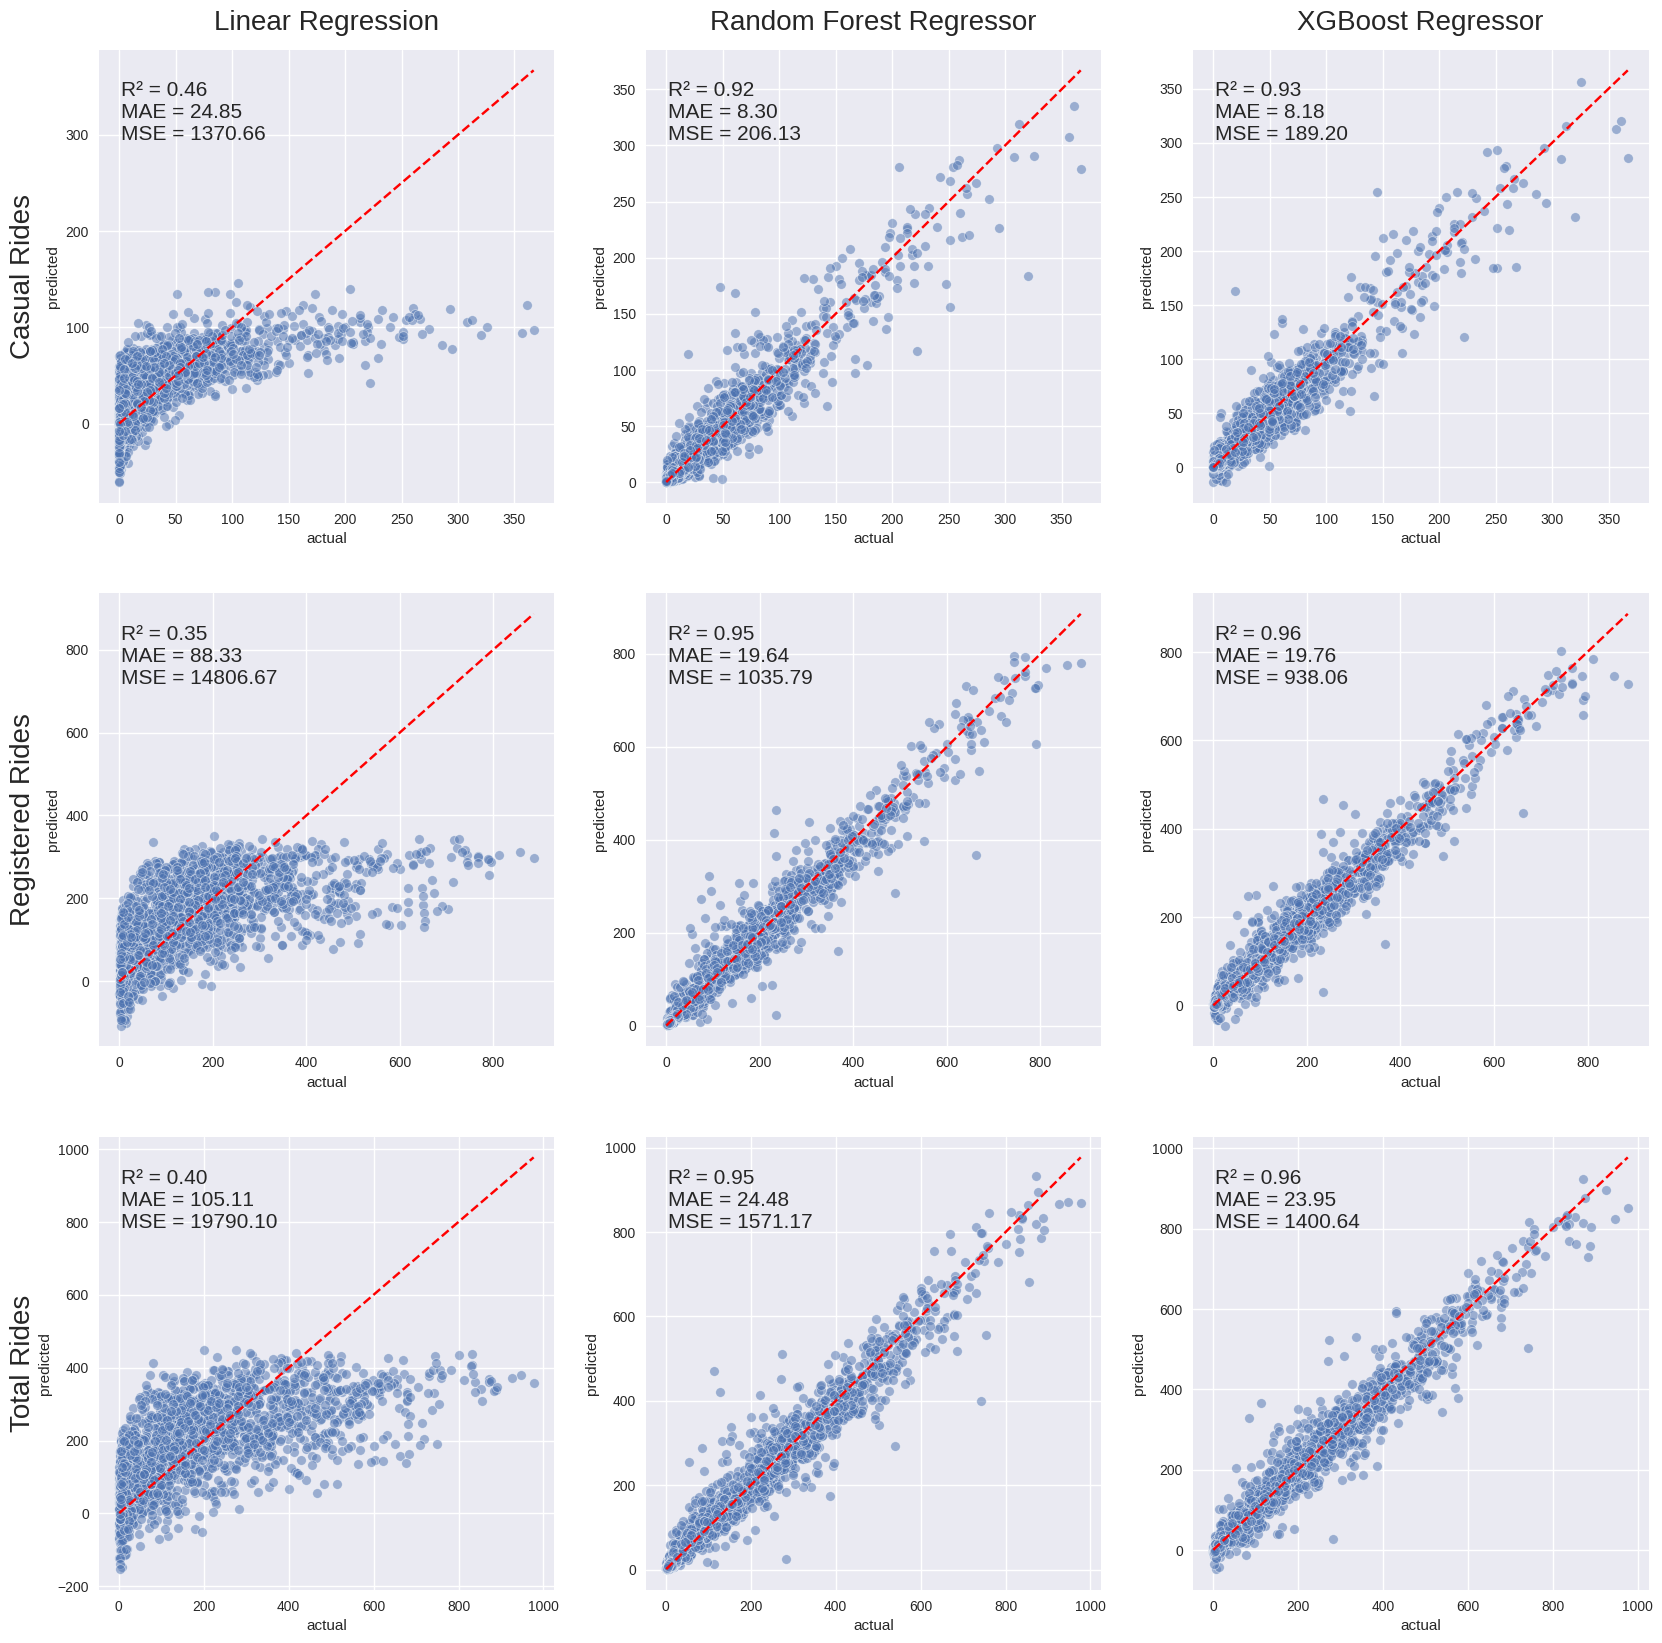

In [27]:
# List of target variables
targets = ['casual_rides', 'registered_rides', 'total_rides']

# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

# Iterate through each target
for i, target in enumerate(targets):
    
    y_tr = y_train[target]
    y_te = y_test[target]

    for j, (model_name, model) in enumerate(models.items()):
        
        y_pred, metrics = train_and_evaluate(model, X_train, X_test, y_tr, y_te)

        # Plot Actual vs Predicted
        sns.scatterplot(x=y_te, y=y_pred, alpha=0.5, ax=axes[i,j])
        axes[i,j].plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
        axes[i,j].set(xlabel='actual', ylabel='predicted')
        axes[i,j].annotate(f'R² = {metrics["r2"]:.2f}\nMAE = {metrics["mae"]:.2f}\nMSE = {metrics["mse"]:.2f}', 
                           (0.05, 0.8), xycoords='axes fraction', size=15)

for ax, col in zip(axes[0,:], ['Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor']):
    ax.annotate(col, (0.5, 1), xytext=(0, 10), ha='center', va='bottom',
                size=20, xycoords='axes fraction', textcoords='offset points')
    
for ax, row in zip(axes[:,0], ['Casual Rides', 'Registered Rides', 'Total Rides']):
    ax.annotate(row, (0, 0.5), xytext=(-45, 0), ha='right', va='center', 
                rotation=90, size=20, xycoords='axes fraction', textcoords='offset points')

plt.show()



#### Observation
XGBoost Regressor outperforms the other models on all 3 target variables, with the following Validation metrics:

<b><br>1. Casual Rides: </br></b>
<br>R2 = 0.93</br>
<br>MAE = 8.18</br>
<br>MSE = 189.20</br>

<b><br>2. Registered Rides: </br></b>
<br>R2 = 0.96</br>
<br>MAE = 19.76</br>
<br>MSE = 938.06</br>

<b><br>3. Total Rides: </br></b>
<br>R2 = 0.96</br>
<br>MAE = 23.96</br>
<br>MSE = 1400.64</br>


### 2nd Approach: Multiple-Output Models

##### 1. Initiate Models

In [28]:
rf_base_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_base_model = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

##### 2. Train & Evaluate

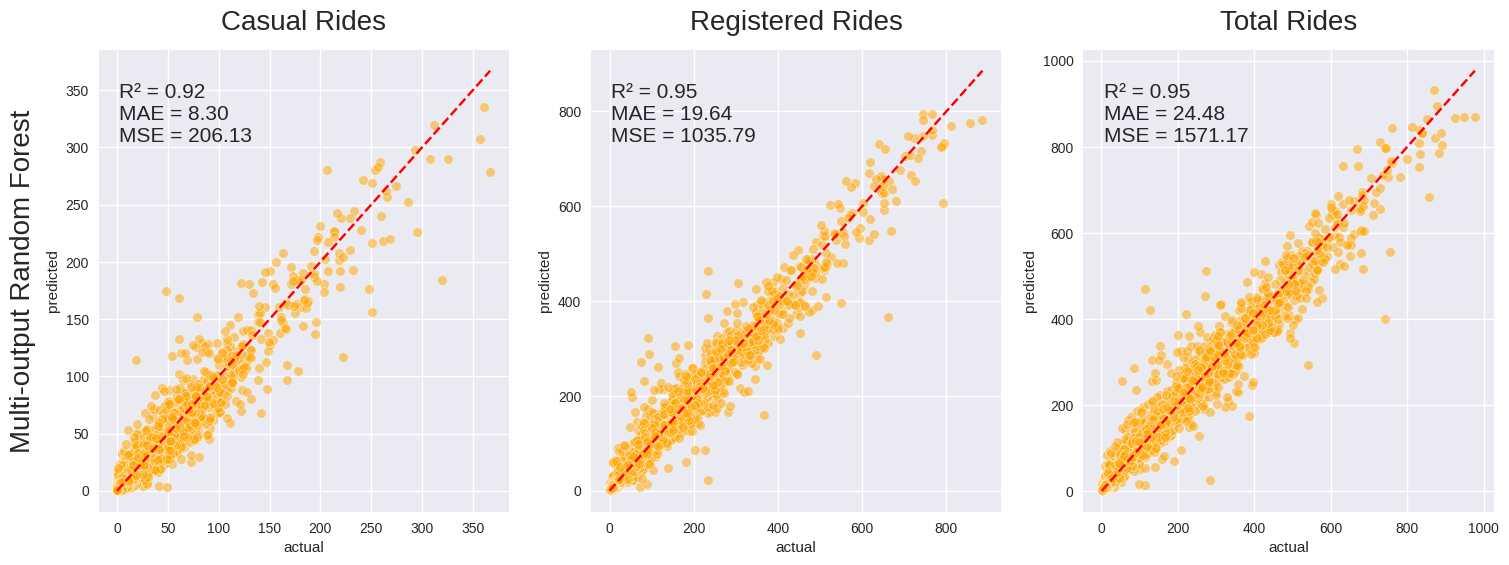

In [29]:
# Initialize base model
y_pred_multi, metrics_multi = train_and_evaluate_multi(rf_base_model, X_train, X_test, y_train, y_test)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterate through each target
for i, target in enumerate(targets):
    y_tr = y_train[target]
    y_te= y_test[target]

    y_pred = y_pred_multi[:, i]
    metrics = metrics_multi[i]

    # Plot Actual vs Predicted
    sns.scatterplot(x=y_te, y=y_pred, alpha=0.5, ax=axes[i], color='orange')
    axes[i].plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
    axes[i].set(xlabel='actual', ylabel='predicted')
    axes[i].annotate(f'R² = {metrics["r2"]:.2f}\nMAE = {metrics["mae"]:.2f}\nMSE = {metrics["mse"]:.2f}', 
                        (0.05, 0.8), xycoords='axes fraction', size=15)

for ax, col in zip(axes, ['Casual Rides', 'Registered Rides', 'Total Rides']):
    ax.annotate(col, (0.5, 1), xytext=(0, 10), ha='center', va='bottom',
                size=20, xycoords='axes fraction', textcoords='offset points')
    
axes[0].annotate('Multi-output Random Forest', (0, 0.5), xytext=(-45, 0), ha='right', va='center', 
            rotation=90, size=20, xycoords='axes fraction', textcoords='offset points')

plt.show()

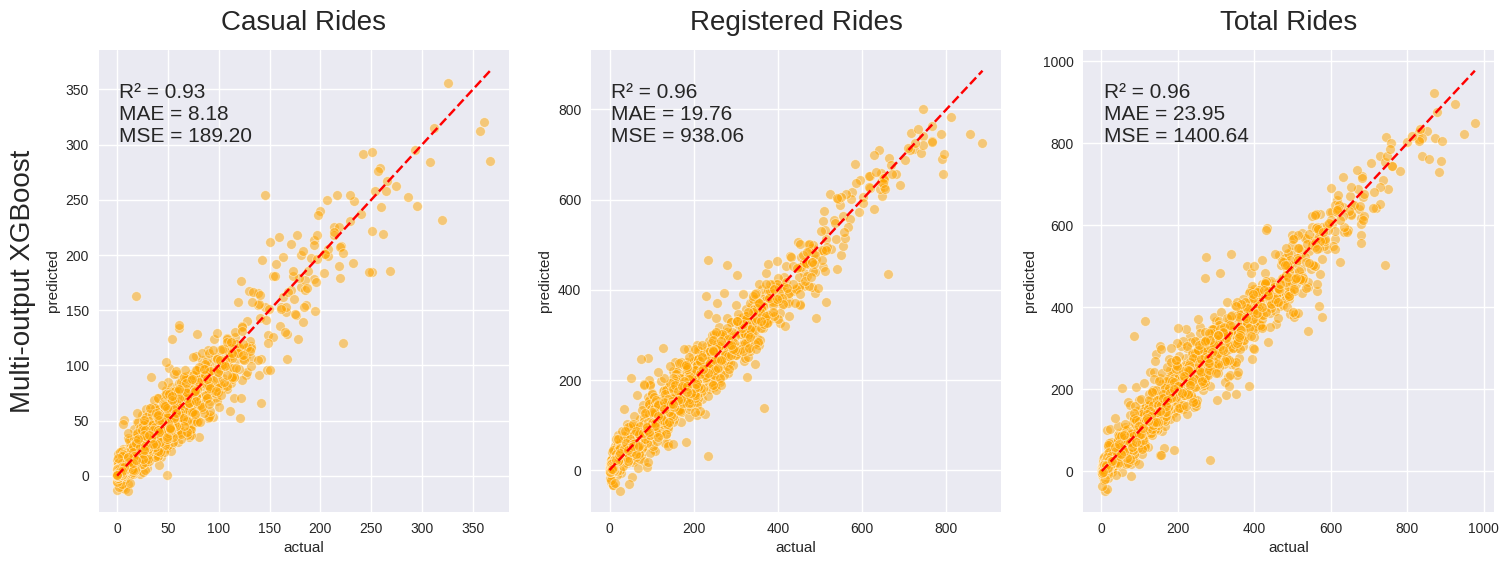

In [30]:
# Initialize base model
base_model = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

y_pred_multi, metrics_multi = train_and_evaluate_multi(xgb_base_model, X_train, X_test, y_train, y_test)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterate through each target
for i, target in enumerate(targets):
    y_tr = y_train[target]
    y_te= y_test[target]
    
    y_pred = y_pred_multi[:, i]
    metrics = metrics_multi[i]

    # Plot Actual vs Predicted
    sns.scatterplot(x=y_te, y=y_pred, alpha=0.5, ax=axes[i], color='orange')
    axes[i].plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
    axes[i].set(xlabel='actual', ylabel='predicted')
    axes[i].annotate(f'R² = {metrics["r2"]:.2f}\nMAE = {metrics["mae"]:.2f}\nMSE = {metrics["mse"]:.2f}', 
                        (0.05, 0.8), xycoords='axes fraction', size=15)

for ax, col in zip(axes, ['Casual Rides', 'Registered Rides', 'Total Rides']):
    ax.annotate(col, (0.5, 1), xytext=(0, 10), ha='center', va='bottom',
                size=20, xycoords='axes fraction', textcoords='offset points')
    
axes[0].annotate('Multi-output XGBoost', (0, 0.5), xytext=(-45, 0), ha='right', va='center', 
            rotation=90, size=20, xycoords='axes fraction', textcoords='offset points')

plt.show()

### 3rd Approach: Derived Model from Single-output models

##### 1. Initiate Models

In [31]:
# Initialize models
rf_model_3 = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model_3 = XGBRegressor(
    n_estimators=100, random_state=42, objective='reg:squarederror')

##### 2. Train & Evaluate

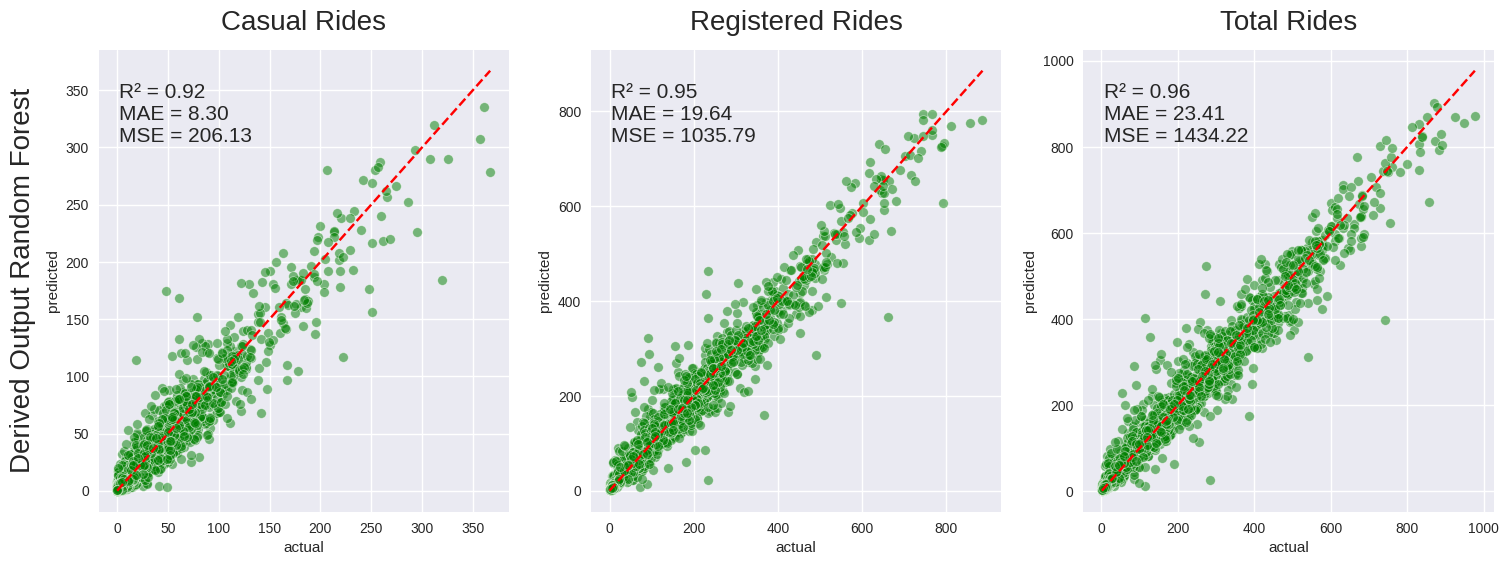

In [32]:
# Initialize base model
y_pred_multi, metrics_multi = train_and_evaluate_derived(rf_model_3, X_train, X_test, y_train, y_test)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterate through each target
for i, target in enumerate(targets):
    y_tr = y_train[target]
    y_te= y_test[target]

    y_pred = y_pred_multi[:, i]
    metrics = metrics_multi[i]

    # Plot Actual vs Predicted
    sns.scatterplot(x=y_te, y=y_pred, alpha=0.5, ax=axes[i], color='green')
    axes[i].plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
    axes[i].set(xlabel='actual', ylabel='predicted')
    axes[i].annotate(f'R² = {metrics["r2"]:.2f}\nMAE = {metrics["mae"]:.2f}\nMSE = {metrics["mse"]:.2f}', 
                        (0.05, 0.8), xycoords='axes fraction', size=15)

for ax, col in zip(axes, ['Casual Rides', 'Registered Rides', 'Total Rides']):
    ax.annotate(col, (0.5, 1), xytext=(0, 10), ha='center', va='bottom',
                size=20, xycoords='axes fraction', textcoords='offset points')
    
axes[0].annotate('Derived Output Random Forest', (0, 0.5), xytext=(-45, 0), ha='right', va='center', 
            rotation=90, size=20, xycoords='axes fraction', textcoords='offset points')

plt.show()

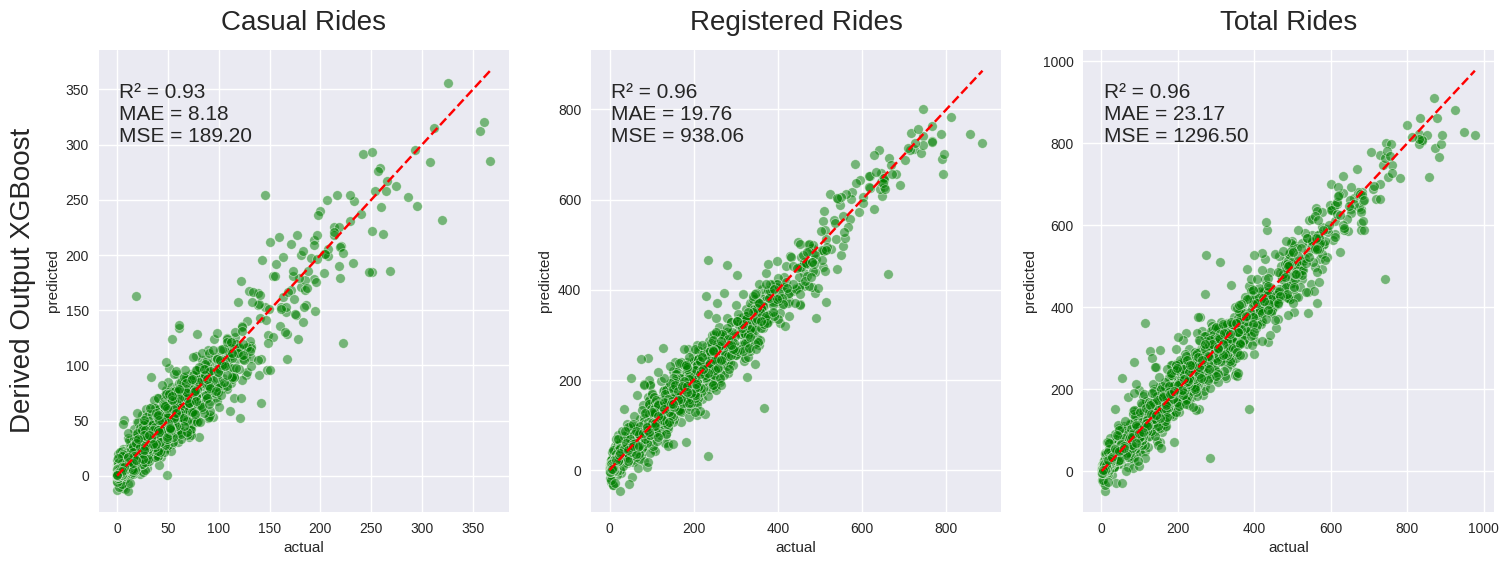

In [33]:
# Initialize base model
y_pred_multi, metrics_multi = train_and_evaluate_derived(xgb_model_3, X_train, X_test, y_train, y_test)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterate through each target
for i, target in enumerate(targets):
    y_tr = y_train[target]
    y_te= y_test[target]

    y_pred = y_pred_multi[:, i]
    metrics = metrics_multi[i]

    # Plot Actual vs Predicted
    sns.scatterplot(x=y_te, y=y_pred, alpha=0.5, ax=axes[i], color='green')
    axes[i].plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
    axes[i].set(xlabel='actual', ylabel='predicted')
    axes[i].annotate(f'R² = {metrics["r2"]:.2f}\nMAE = {metrics["mae"]:.2f}\nMSE = {metrics["mse"]:.2f}', 
                        (0.05, 0.8), xycoords='axes fraction', size=15)

for ax, col in zip(axes, ['Casual Rides', 'Registered Rides', 'Total Rides']):
    ax.annotate(col, (0.5, 1), xytext=(0, 10), ha='center', va='bottom',
                size=20, xycoords='axes fraction', textcoords='offset points')
    
axes[0].annotate('Derived Output XGBoost', (0, 0.5), xytext=(-45, 0), ha='right', va='center', 
            rotation=90, size=20, xycoords='axes fraction', textcoords='offset points')

plt.show()

#### Observation
- XGBoost Regressor has the highest r2 score for target variable "count" (or total_rides), along with the other target variables

#### Best Approach
- From all the three approaches, we find that the 2nd and 3rd approaches have an r2 score of 0.96 as compared to the r2 score of 1st approach of 0.95 on "count" target variable with XGB Regressor
- Amongst 2nd and 3rd approaches, 3rd approach has a lower MAE of 23.17 as compared to 23.95 score of 2nd approach on "count" variable with XGB Regressor
- 3rd Approach outperforms the other approaches on the metrics for other target variables. This also ensures consistency with the other two target variables, ensuring that the sum of "casual" and "registered" always equals "total"

<b>Chosen Approach: Training two separate models for casual rides and registered rides. Adding the predictions of both the models to obtain the total rides</b>

## GridSearchCV
Finding the optimum hyperparameter values by using GridSearchCV 

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  18.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  38.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  16.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  20.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  41.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estim

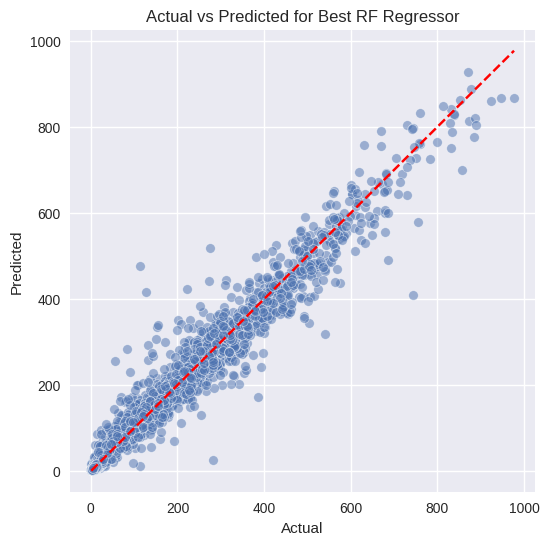

In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)

# Fit to a specific target, e.g., 'total_rides'
grid_search.fit(X_train, y_train['total_rides'])

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate
y_pred, metrics = train_and_evaluate(best_rf, X_train, X_test,
                   y_train['total_rides'], y_test['total_rides'])


print(f'R-squared (R²): {metrics["r2"]:.2f}')
print(f'Mean Squared Error (MAE): {metrics["mae"]:.2f}')
print(f'Mean Squared Error (MSE): {metrics["mse"]:.2f}')

# Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test["total_rides"], y=y_pred, alpha=0.5)
plt.plot([y_test["total_rides"].min(), y_test["total_rides"].max()], [y_test["total_rides"].min(), y_test["total_rides"].max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted for Best RF Regressor')
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.0s
[CV] END c

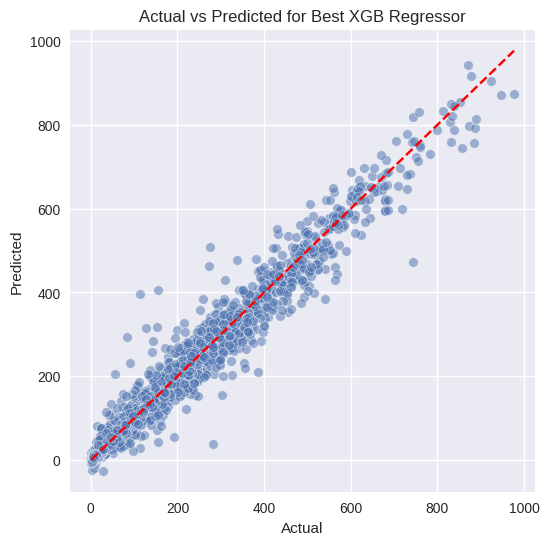

In [35]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_grid=param_grid_xgb,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)

# Fit to 'total_rides' target
grid_search_xgb.fit(X_train, y_train['total_rides'])

# Best parameters
print(f'Best Parameters for XGBoost: {grid_search_xgb.best_params_}')

# Best estimator
best_xgb = grid_search_xgb.best_estimator_

# Evaluate
y_pred, metrics = train_and_evaluate(best_xgb, X_train, X_test,
                   y_train['total_rides'], y_test['total_rides'])


print(f'R-squared (R²): {metrics["r2"]:.2f}')
print(f'Mean Squared Error (MAE): {metrics["mae"]:.2f}')
print(f'Mean Squared Error (MSE): {metrics["mse"]:.2f}')

# Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test["total_rides"], y=y_pred, alpha=0.5)
plt.plot([y_test["total_rides"].min(), y_test["total_rides"].max()], [y_test["total_rides"].min(), y_test["total_rides"].max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted for Best XGB Regressor')
plt.show()

##### Observation
<p> After finding the best hyperparameter values for both Random Forest and XGB Regressor, the latter still outperforms the former by a considerable margin. </p>

Hence, XGB Regressor is the optimum model for the task with the following hyper parameter values:
- learning_rate: 0.1
- max_depth: 7 
- colsample_bytree: 1.0
- n_estimators: 200
- subsample: 0.8


<b>Note:</b> We observe the model predicts negative values for some instances, however, since demand cannot be negative, we replace those values with 0 for the test data.

## Feature Importance

#### BY RF:

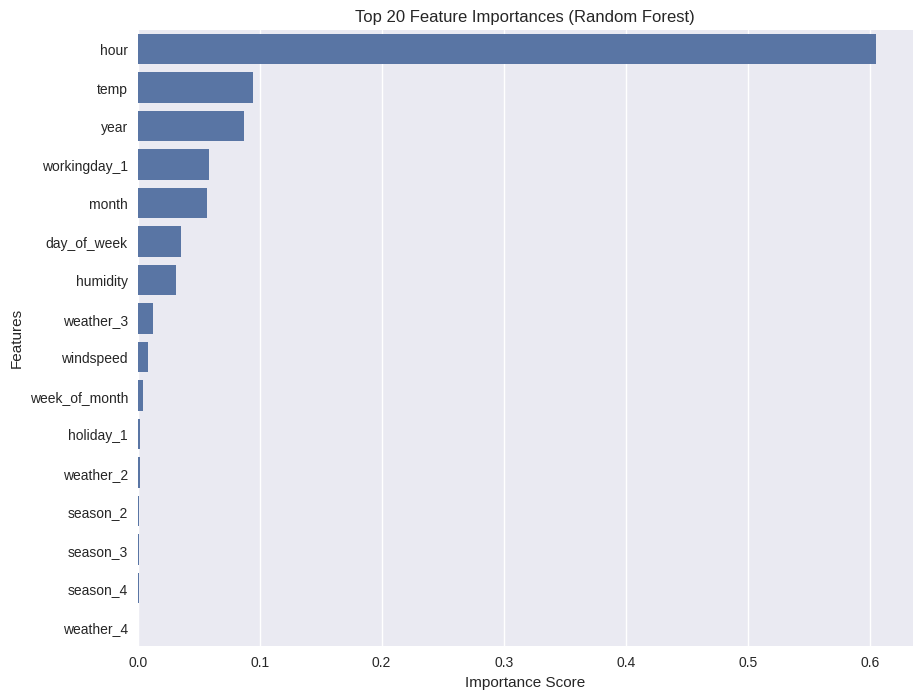

In [36]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importance = pd.Series(
    importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance[:20], y=feature_importance.index[:20])
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#### by XGBoost:

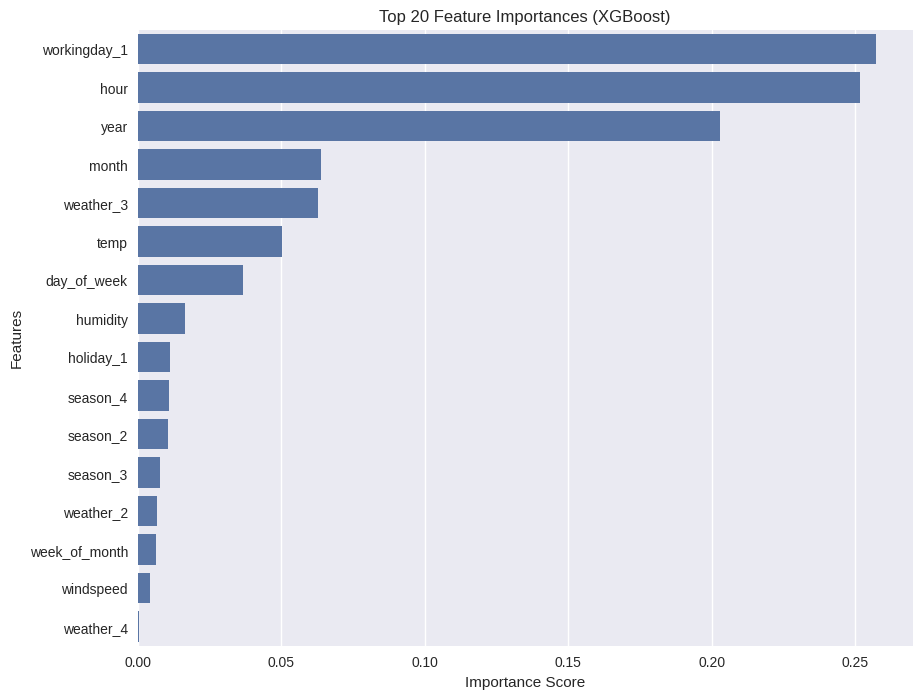

In [37]:
importances_xgb = best_xgb.feature_importances_
feature_names = X_train.columns
feature_importance_xgb = pd.Series(
    importances_xgb, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_xgb[:20], y=feature_importance_xgb.index[:20])
plt.title('Top 20 Feature Importances (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#### Observations
- 5 most important features mutually identified by Random Forest Regressor and XGB Regressor are: 
    * Hour of the Day
    * Year
    * Working Day
    * Temperature
    * Month

- Some other important features are:
    * Weather
    * Day of Week
    * Week of Month

<b>This shows that features based on time are very significant for predicting the number of rides, followed by factors like Weather and Temperature, affecting Casual Rides strongly and factors like Working Day, affecting Registered Rides strongly, which aligns with the intuitive predictions.</b>

## Create a table

In [39]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_train):
    print(train_index, test_index)

[   1    2    3 ... 8702 8703 8705] [   0    8   14 ... 8704 8706 8707]
[   0    1    2 ... 8705 8706 8707] [  15   26   29 ... 8682 8684 8702]
[   0    1    2 ... 8705 8706 8707] [   6   12   24 ... 8699 8700 8703]
[   0    2    3 ... 8704 8706 8707] [   1    7   11 ... 8694 8696 8705]
[   0    1    6 ... 8705 8706 8707] [   2    3    4 ... 8690 8693 8695]


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

# Define models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(
    n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1,
                         max_depth=7, subsample=0.8, colsample_bytree=0.8, random_state=42)

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Target Variable': [],
    'MSE': [],
    'R-squared (R²)': []
}

# Define KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function for K-Fold Cross-Validation and Metric Aggregation
def cross_val_evaluate(model, X, y, model_name):
    for target in ['casual_rides', 'registered_rides', 'total_rides']:
        y_target = y[target]

        # Perform K-Fold cross-validation for MSE and R-squared
        mse_scores = cross_val_score(
            model, X, y_target, cv=kf, scoring=make_scorer(mean_squared_error))
        r2_scores = cross_val_score(
            model, X, y_target, cv=kf, scoring=make_scorer(r2_score))

        # Calculate mean and standard deviation for both metrics
        mse_mean_std = f"{np.mean(mse_scores):.3f} ± {np.std(mse_scores):.3f}"
        r2_mean_std = f"{np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}"

        # Store the results
        metrics['Model'].append(model_name)
        metrics['Target Variable'].append(target)
        metrics['MSE'].append(mse_mean_std)
        metrics['R-squared (R²)'].append(r2_mean_std)


# Evaluate models using cross-validation
cross_val_evaluate(linear_model, X_train, y_train, 'Linear Regression')
cross_val_evaluate(rf_model, X_train, y_train, 'Random Forest')
cross_val_evaluate(xgb_model, X_train, y_train, 'XGBoost')

# Train multi-output versions
multi_rf = MultiOutputRegressor(rf_model)
multi_xgb = MultiOutputRegressor(xgb_model)


# Multi-output cross-validation function
def cross_val_evaluate_multi(model, X, y, model_name):

    r2_acc = np.zeros((5,3))
    mse_acc = np.zeros((5, 3))

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)
        
        r2_split = np.zeros((3,))
        mse_split = np.zeros((3,))

        for j, target in enumerate(['casual_rides', 'registered_rides', 'total_rides']):

            # Calculate evaluation metrics
            mse = mean_squared_error(y_test[target], y_pred[:, j])
            r2 = r2_score(y_test[target], y_pred[:, j])

            r2_split[j] = r2
            mse_split[j] = mse
        
        r2_acc[i, :] = r2_split
        mse_acc[i, :] = mse_split

    for i, target in enumerate(['casual_rides', 'registered_rides', 'total_rides']):

        r2_scores = r2_acc[:, i]
        mse_scores = mse_acc[:, i]

        # Calculate mean and standard deviation for both metrics
        mse_mean_std = f"{np.mean(mse_scores):.3f} ± {np.std(mse_scores):.3f}"
        r2_mean_std = f"{np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}"

        metrics['Model'].append(model_name)
        metrics['Target Variable'].append(target)
        metrics['MSE'].append(mse_mean_std)
        metrics['R-squared (R²)'].append(r2_mean_std)


# Train and evaluate Multi-Output Random Forest and XGBoost
cross_val_evaluate_multi(multi_rf, X_train, y_train, 'Multi-Output RF')
cross_val_evaluate_multi(multi_xgb, X_train, y_train, 'Multi-Output XGBoost')


KeyboardInterrupt: 

In [40]:
# Train multi-output versions
multi_rf = MultiOutputRegressor(rf_model)
multi_xgb = MultiOutputRegressor(xgb_model)

# Multi-output cross-validation function
def cross_val_evaluate_derived(model, X, y, model_name):

    r2_acc = np.zeros((5,3))
    mse_acc = np.zeros((5, 3))

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        r2_split = np.zeros((3,))
        mse_split = np.zeros((3,))

        y_pred_total = np.zeros((y_test.shape[0],))

        for j, target in enumerate(['casual_rides', 'registered_rides']):

            # Train the model
            model.fit(X_train, y_train[target])

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Acculumate to total
            y_pred_total += y_pred

            # Calculate evaluation metrics
            mse = mean_squared_error(y_test[target], y_pred)
            r2 = r2_score(y_test[target], y_pred)

            r2_split[j] = r2
            mse_split[j] = mse

        r2_split[2] = r2_score(y_test['total_rides'], y_pred_total)
        mse_split[2] = mean_squared_error(y_test['total_rides'], y_pred_total)
        
        r2_acc[i, :] = r2_split
        mse_acc[i, :] = mse_split

    for i, target in enumerate(['casual_rides', 'registered_rides', 'total_rides']):

        r2_scores = r2_acc[:, i]
        mse_scores = mse_acc[:, i]

        # Calculate mean and standard deviation for both metrics
        mse_mean_std = f"{np.mean(mse_scores):.3f} ± {np.std(mse_scores):.3f}"
        r2_mean_std = f"{np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}"

        metrics['Model'].append(model_name)
        metrics['Target Variable'].append(target)
        metrics['MSE'].append(mse_mean_std)
        metrics['R-squared (R²)'].append(r2_mean_std)

# Train and evaluate Multi-Output Random Forest and XGBoost
cross_val_evaluate_derived(multi_rf, X_train, y_train, 'Multi-Output RF')
cross_val_evaluate_derived(multi_xgb, X_train, y_train, 'Multi-Output XGBoost')

[[ 220.08533697 1039.41387491 1717.68699891]
 [ 199.71836556 1008.32932486 1852.94879501]
 [ 207.17109983 1473.62562583 1927.85142044]
 [ 229.16435652 1350.1147019  2048.66441752]
 [ 250.4746965  1180.38158989 1698.65821269]]
[[0.90629076 0.95561521 0.94801046]
 [0.91437081 0.95470788 0.94130966]
 [0.91896212 0.93296806 0.93945628]
 [0.90985217 0.94431056 0.94103543]
 [0.90536657 0.94698378 0.94786382]]
221.323 ± 17.776
0.911 ± 0.005
1210.373 ± 178.761
0.947 ± 0.008
1849.162 ± 131.107
0.944 ± 0.004
[[ 206.70901668 1020.50848097 1581.35713586]
 [ 201.99364372 1048.60853783 1488.60016001]
 [ 204.36951068 1292.99832093 1881.65338552]
 [ 195.30292456 1198.88151253 1747.96685576]
 [ 221.63278435 1115.30538283 1619.45764226]]
[[0.91198623 0.95642251 0.95213675]
 [0.91339529 0.95289862 0.95285004]
 [0.92005801 0.9411844  0.94090712]
 [0.92317247 0.95054859 0.9496901 ]
 [0.91626352 0.94990665 0.95029467]]
206.002 ± 8.695
0.917 ± 0.004
1135.260 ± 100.004
0.950 ± 0.005
1663.807 ± 137.115
0.949 ±

In [43]:
# Define models
rf_model = RandomForestRegressor(
    n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1,
                         max_depth=7, subsample=0.8, colsample_bytree=0.8, random_state=42)

# Derived model cross-validation function
def cross_val_evaluate_derived(model, X, y, model_name):

    r2_acc = np.zeros((5,3))
    mse_acc = np.zeros((5, 3))

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)
        
        r2_split = np.zeros((3,))
        mse_split = np.zeros((3,))

        for j, target in enumerate(['casual_rides', 'registered_rides', 'total_rides']):

            # Calculate evaluation metrics
            mse = mean_squared_error(y_test[target], y_pred[:, j])
            r2 = r2_score(y_test[target], y_pred[:, j])

            r2_split[j] = r2
            mse_split[j] = mse
        
        r2_acc[i, :] = r2_split
        mse_acc[i, :] = mse_split

    for i, target in enumerate(['casual_rides', 'registered_rides', 'total_rides']):

        r2_scores = r2_acc[:, i]
        mse_scores = mse_acc[:, i]

        # Calculate mean and standard deviation for both metrics
        mse_mean_std = f"{np.mean(mse_scores):.3f} ± {np.std(mse_scores):.3f}"
        r2_mean_std = f"{np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}"

        metrics['Model'].append(model_name)
        metrics['Target Variable'].append(target)
        metrics['MSE'].append(mse_mean_std)
        metrics['R-squared (R²)'].append(r2_mean_std)


# Train and evaluate Derived Random Forest and XGBoost
cross_val_evaluate_derived(multi_rf, X_train, y_train, 'Multi-Output RF')
cross_val_evaluate_derived(multi_xgb, X_train, y_train, 'Multi-Output XGBoost')

[[0.90629076 0.95561521 0.94801046]
 [0.91437081 0.95470788 0.94130966]
 [0.91896212 0.93296806 0.93945628]
 [0.90985217 0.94431056 0.94103543]
 [0.90536657 0.94698378 0.94786382]]
[[ 220.08533697 1039.41387491 1717.68699891]
 [ 199.71836556 1008.32932486 1852.94879501]
 [ 207.17109983 1473.62562583 1927.85142044]
 [ 229.16435652 1350.1147019  2048.66441752]
 [ 250.4746965  1180.38158989 1698.65821269]]
221.323 ± 17.776
0.911 ± 0.005
1210.373 ± 178.761
0.947 ± 0.008
1849.162 ± 131.107
0.944 ± 0.004
[[0.91198623 0.95642251 0.95213675]
 [0.91339529 0.95289862 0.95285004]
 [0.92005801 0.9411844  0.94090712]
 [0.92317247 0.95054859 0.9496901 ]
 [0.91626352 0.94990665 0.95029467]]
[[ 206.70901668 1020.50848097 1581.35713586]
 [ 201.99364372 1048.60853783 1488.60016001]
 [ 204.36951068 1292.99832093 1881.65338552]
 [ 195.30292456 1198.88151253 1747.96685576]
 [ 221.63278435 1115.30538283 1619.45764226]]
206.002 ± 8.695
0.917 ± 0.004
1135.260 ± 100.004
0.950 ± 0.005
1663.807 ± 137.115
0.949 ±

In [40]:
# Create the metrics table
metrics_table = pd.DataFrame(metrics)

# Pivot the table to make target variables as columns, with MSE and R-squared as subcolumns
pivot_table = metrics_table.pivot_table(index='Model', columns='Target Variable', values=[
                                        'MSE', 'R-squared (R²)'], aggfunc='first')

# Save the pivoted table to an Excel file
pivot_table.to_excel('model_metrics_comparison.xlsx')

# Optionally, print the table to the terminal
print(pivot_table)

                                    MSE                       \
Target Variable            casual_rides     registered_rides   
Model                                                          
Linear Regression     1289.095 ± 73.486  15181.886 ± 630.461   
Multi-Output RF       1084.083 ± 91.274    1084.083 ± 91.274   
Multi-Output XGBoost   847.215 ± 66.448     847.215 ± 66.448   
Random Forest          221.298 ± 16.550   1201.131 ± 173.401   
XGBoost                 178.397 ± 6.878    984.704 ± 103.751   

                                          R-squared (R²)                   \
Target Variable               total_rides   casual_rides registered_rides   
Model                                                                       
Linear Regression     19870.765 ± 654.413  0.481 ± 0.015    0.335 ± 0.020   
Multi-Output RF         1084.083 ± 91.274  0.934 ± 0.002    0.934 ± 0.002   
Multi-Output XGBoost     847.215 ± 66.448  0.948 ± 0.002    0.948 ± 0.002   
Random Forest          18

In [41]:
# Pivot the table to make target variables as main columns, with MSE and R-squared as subcolumns
pivot_table = metrics_table.pivot_table(
    index='Model',
    columns='Target Variable',
    values=['MSE', 'R-squared (R²)'],
    aggfunc='first'
)

# Reorder the columns so that target variables are the main columns, and metrics (MSE, R-squared) are subcolumns
pivot_table = pivot_table.swaplevel(axis=1).sort_index(axis=1)

# Save the pivoted table to an Excel file
pivot_table.to_excel('model_metrics_comparison.xlsx')

# Optionally, print the table to the terminal
print(pivot_table)

Target Variable            casual_rides                    registered_rides  \
                                    MSE R-squared (R²)                  MSE   
Model                                                                         
Linear Regression     1289.095 ± 73.486  0.481 ± 0.015  15181.886 ± 630.461   
Multi-Output RF       1084.083 ± 91.274  0.934 ± 0.002    1084.083 ± 91.274   
Multi-Output XGBoost   847.215 ± 66.448  0.948 ± 0.002     847.215 ± 66.448   
Random Forest          221.298 ± 16.550  0.911 ± 0.004   1201.131 ± 173.401   
XGBoost                 178.397 ± 6.878  0.928 ± 0.003    984.704 ± 103.751   

Target Variable                              total_rides                 
                     R-squared (R²)                  MSE R-squared (R²)  
Model                                                                    
Linear Regression     0.335 ± 0.020  19870.765 ± 654.413  0.393 ± 0.020  
Multi-Output RF       0.934 ± 0.002    1084.083 ± 91.274  0.934 ± 0.002

## Make Predictions Test set

#### Saving the Model

In [42]:
from xgboost import XGBRegressor
import joblib

# model for casual rides
xgb_model_casual = XGBRegressor(n_estimators=200, learning_rate=0.1,
                         max_depth=7, subsample=0.8, colsample_bytree=0.8, random_state=42)

# model for registered rides
xgb_model_reg = XGBRegressor(n_estimators=200, learning_rate=0.1,
                         max_depth=7, subsample=0.8, colsample_bytree=0.8, random_state=42)


# Training the models on the training data
xgb_model_casual.fit(X_train, y_train["casual_rides"])
xgb_model_reg.fit(X_train, y_train["registered_rides"])

# Save the trained XGBoost models to files 
joblib.dump(xgb_model_casual, 'xgb_casual_model.pkl')
joblib.dump(xgb_model_reg, 'xgb_registered_model.pkl')

print("Models saved successfully!")

Models saved successfully!


In [43]:
# Load necessary libraries
import joblib

# Load new test data
new_test_data = pd.read_csv('../data/test.csv', parse_dates=['datetime'])
new_test_data.set_index('datetime', inplace=True)

# One-Hot Encoding (ensure the same columns as training data)
new_test_data_encoded = pd.get_dummies(new_test_data, columns=[
                                       'season', 'holiday', 'workingday', 'weather'], drop_first=True)

# Extract time features
new_test_data_encoded['hour'] = new_test_data.index.hour
new_test_data_encoded['day_of_week'] = new_test_data.index.dayofweek
new_test_data_encoded['month'] = new_test_data.index.month
new_test_data_encoded['year'] = new_test_data.index.year
new_test_data_encoded['day_of_month'] = new_test_data.index.day
new_test_data_encoded['week_of_month'] = new_test_data_encoded.day_of_month.apply(
    lambda x: (x-1)//7 + 1
)

new_test_data_encoded.drop(['atemp', 'day_of_month'], axis=1, inplace=True)

# Align the new test data with training data
new_test_data_encoded = new_test_data_encoded[X_train.columns]

# Scale numerical features using the same scaler
numerical_features = ['temp', 'humidity', 'windspeed', 'hour', 'day_of_week', 'month', 'year', 'week_of_month']
new_test_data_encoded[numerical_features] = scaler.transform(
    new_test_data_encoded[numerical_features])

# Load or define the multi-output XGBoost model
xgb_causal_model = joblib.load('xgb_casual_model.pkl')
xgb_reg_model = joblib.load('xgb_registered_model.pkl')
# xgb_total_model = joblib.load('xgb_total_model.pkl')

# Predict using the trained multi-output model
predictions_causal = xgb_causal_model.predict(new_test_data_encoded)
predictions_registered = xgb_reg_model.predict(new_test_data_encoded)
predictions_total = predictions_causal + predictions_registered

# Combine predictions into a single DataFrame
predictions_multi_output = np.column_stack(
    (predictions_causal, predictions_registered, predictions_total))

# Converting negative preds to 0
predictions_multi_output[predictions_multi_output < 0] = 0

# Convert predictions to a DataFrame
predictions = pd.DataFrame(predictions_multi_output, columns=[
                           'casual', 'registered', 'count'], index=new_test_data_encoded.index)

# View predictions
predictions.head()

casual  registered      count
datetime                                            
2011-01-20 00:00:00  2.841200   14.120320  16.961521
2011-01-20 01:00:00  1.015988    6.675775   7.691763
2011-01-20 02:00:00  1.202715    4.551865   5.754580
2011-01-20 03:00:00  1.345074    1.948529   3.293603
2011-01-20 04:00:00  0.957574    1.948529   2.906103

In [44]:
predictions.to_csv('../test_predictions.csv')

# Conclusion


### Insights from Experiments Undertaken

- Removing atemp from the input features increases the r2 score marginally. This is because temp and atemp have a correlation of (0.98), hence, almost exact replica of temp. Therefore, using both the inputs can lead to a minor overfitting.

- Using Date as an input feature in the model directly such as (1, 2, ... , 30) does not perform as well as using the dates as day of a week, ie, converting the dates to numbers between 0 and 6.

- Adding Week of the month, i.e., which week of the month (1st, ..., 4th week) a data point belongs improves performance.

- Adding the year to the input features drastically improves performance, showing there is a very strong upward trend from 2011 to 2012


### Note on Missing Values
It is assumed that there would be no major missing values for the features of a particular instance (i.e., temperature, season, etc.) in the test data since all the input variables are fairly easy to obtain from the internet. Missing values for predictions of a previous value would not affect the model, since predictions are not dependent on previous values. Therefore, prediction for any point in the future can be made given all the input variables are present.

### Result
Final Model achieves a cross-validation r2-score calculated with k-fold = 5, of 0.958